# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
import warnings
from sklearn.decomposition import PCA
import datetime
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
df=pd.read_csv('/content/customer_segmentation.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# Data Pre-processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [5]:
df.nunique()

,0
ID,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


In [6]:
df['Income'].fillna(df['Income'].median(),inplace=True)

In [7]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [8]:
le=LabelEncoder()
df['Education']=le.fit_transform(df['Education'])
df['Marital_Status']=le.fit_transform(df['Marital_Status'])

In [9]:
df.drop('Dt_Customer',axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   int64  
 3   Marital_Status       2240 non-null   int64  
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

<Axes: >

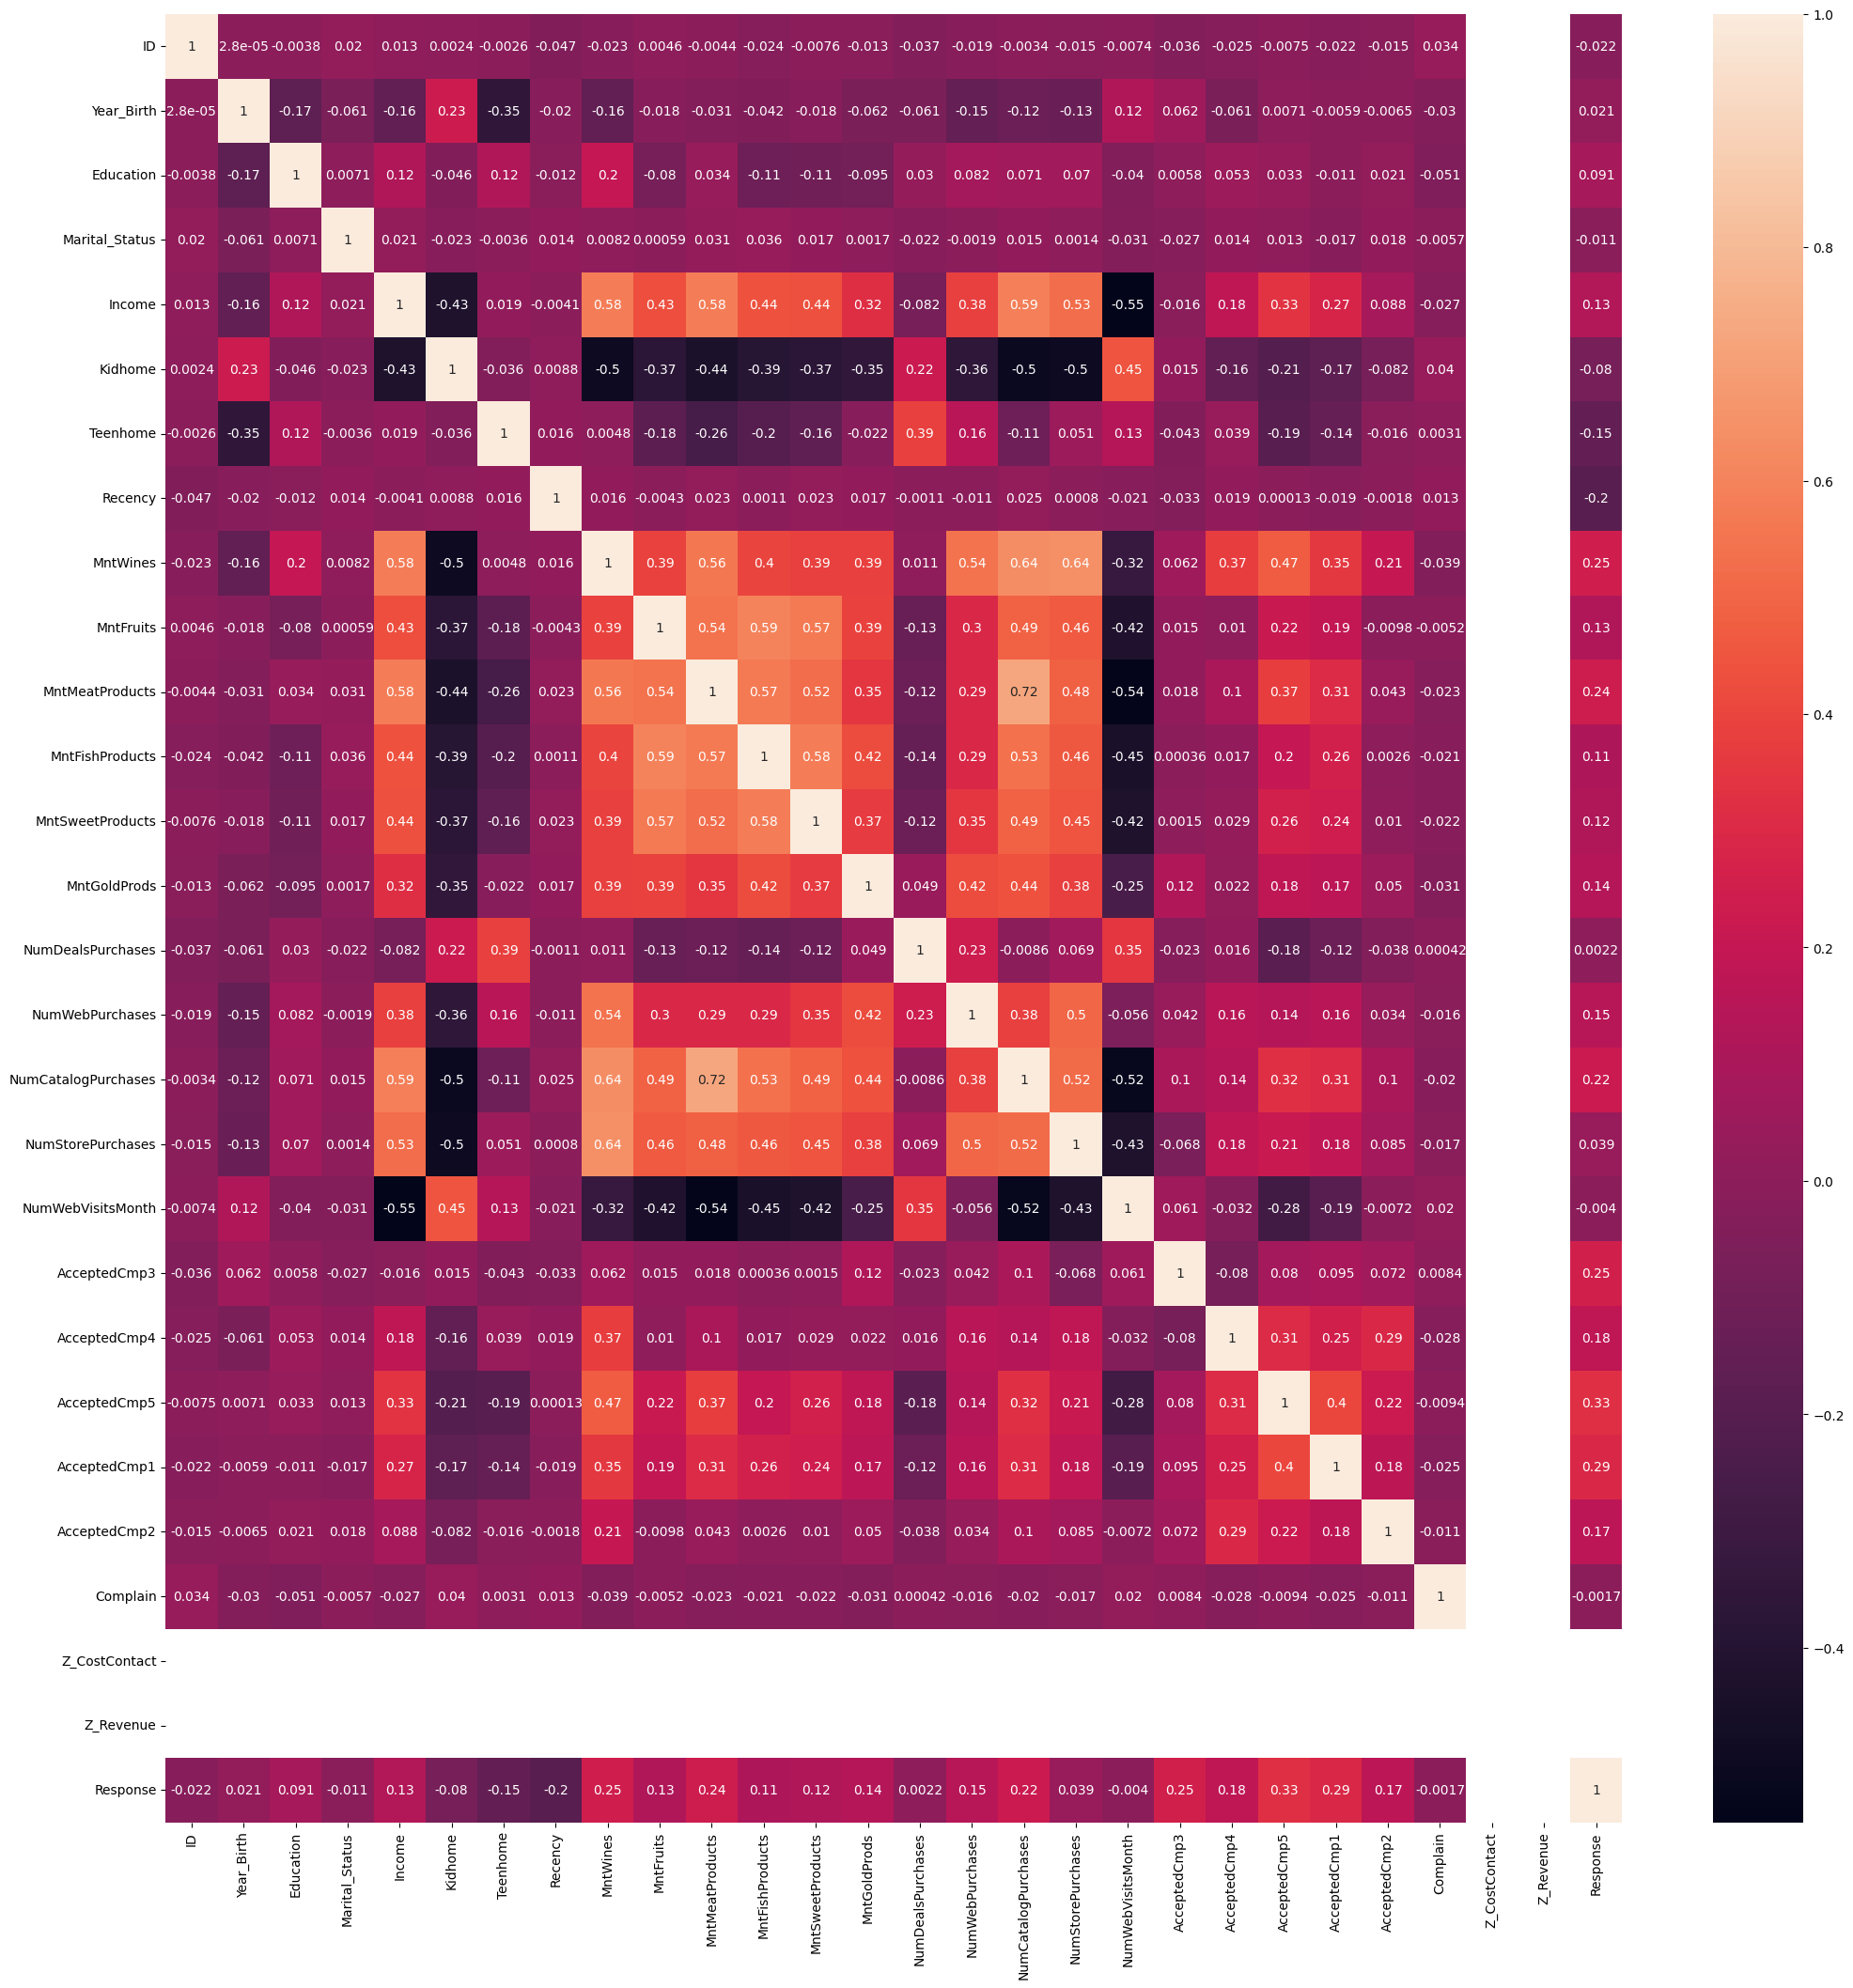

In [11]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)

In [12]:
df['Total_Item_Purchases']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df['Age']=datetime.datetime.now().year-df['Year_Birth']

In [32]:
cols=['Year_Birth','ID','Marital_Status','Recency','AcceptedCmp3','Complain','Z_CostContact','Z_Revenue','AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']
df.drop(cols,axis=1,inplace=True)

In [33]:
print(len(df.columns))
df.columns

18


Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Total_Item_Purchases', 'Age'],
      dtype='object')

In [34]:
df.isna().sum()

,0
Education,0
Income,0
Kidhome,0
Teenhome,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


<Axes: >

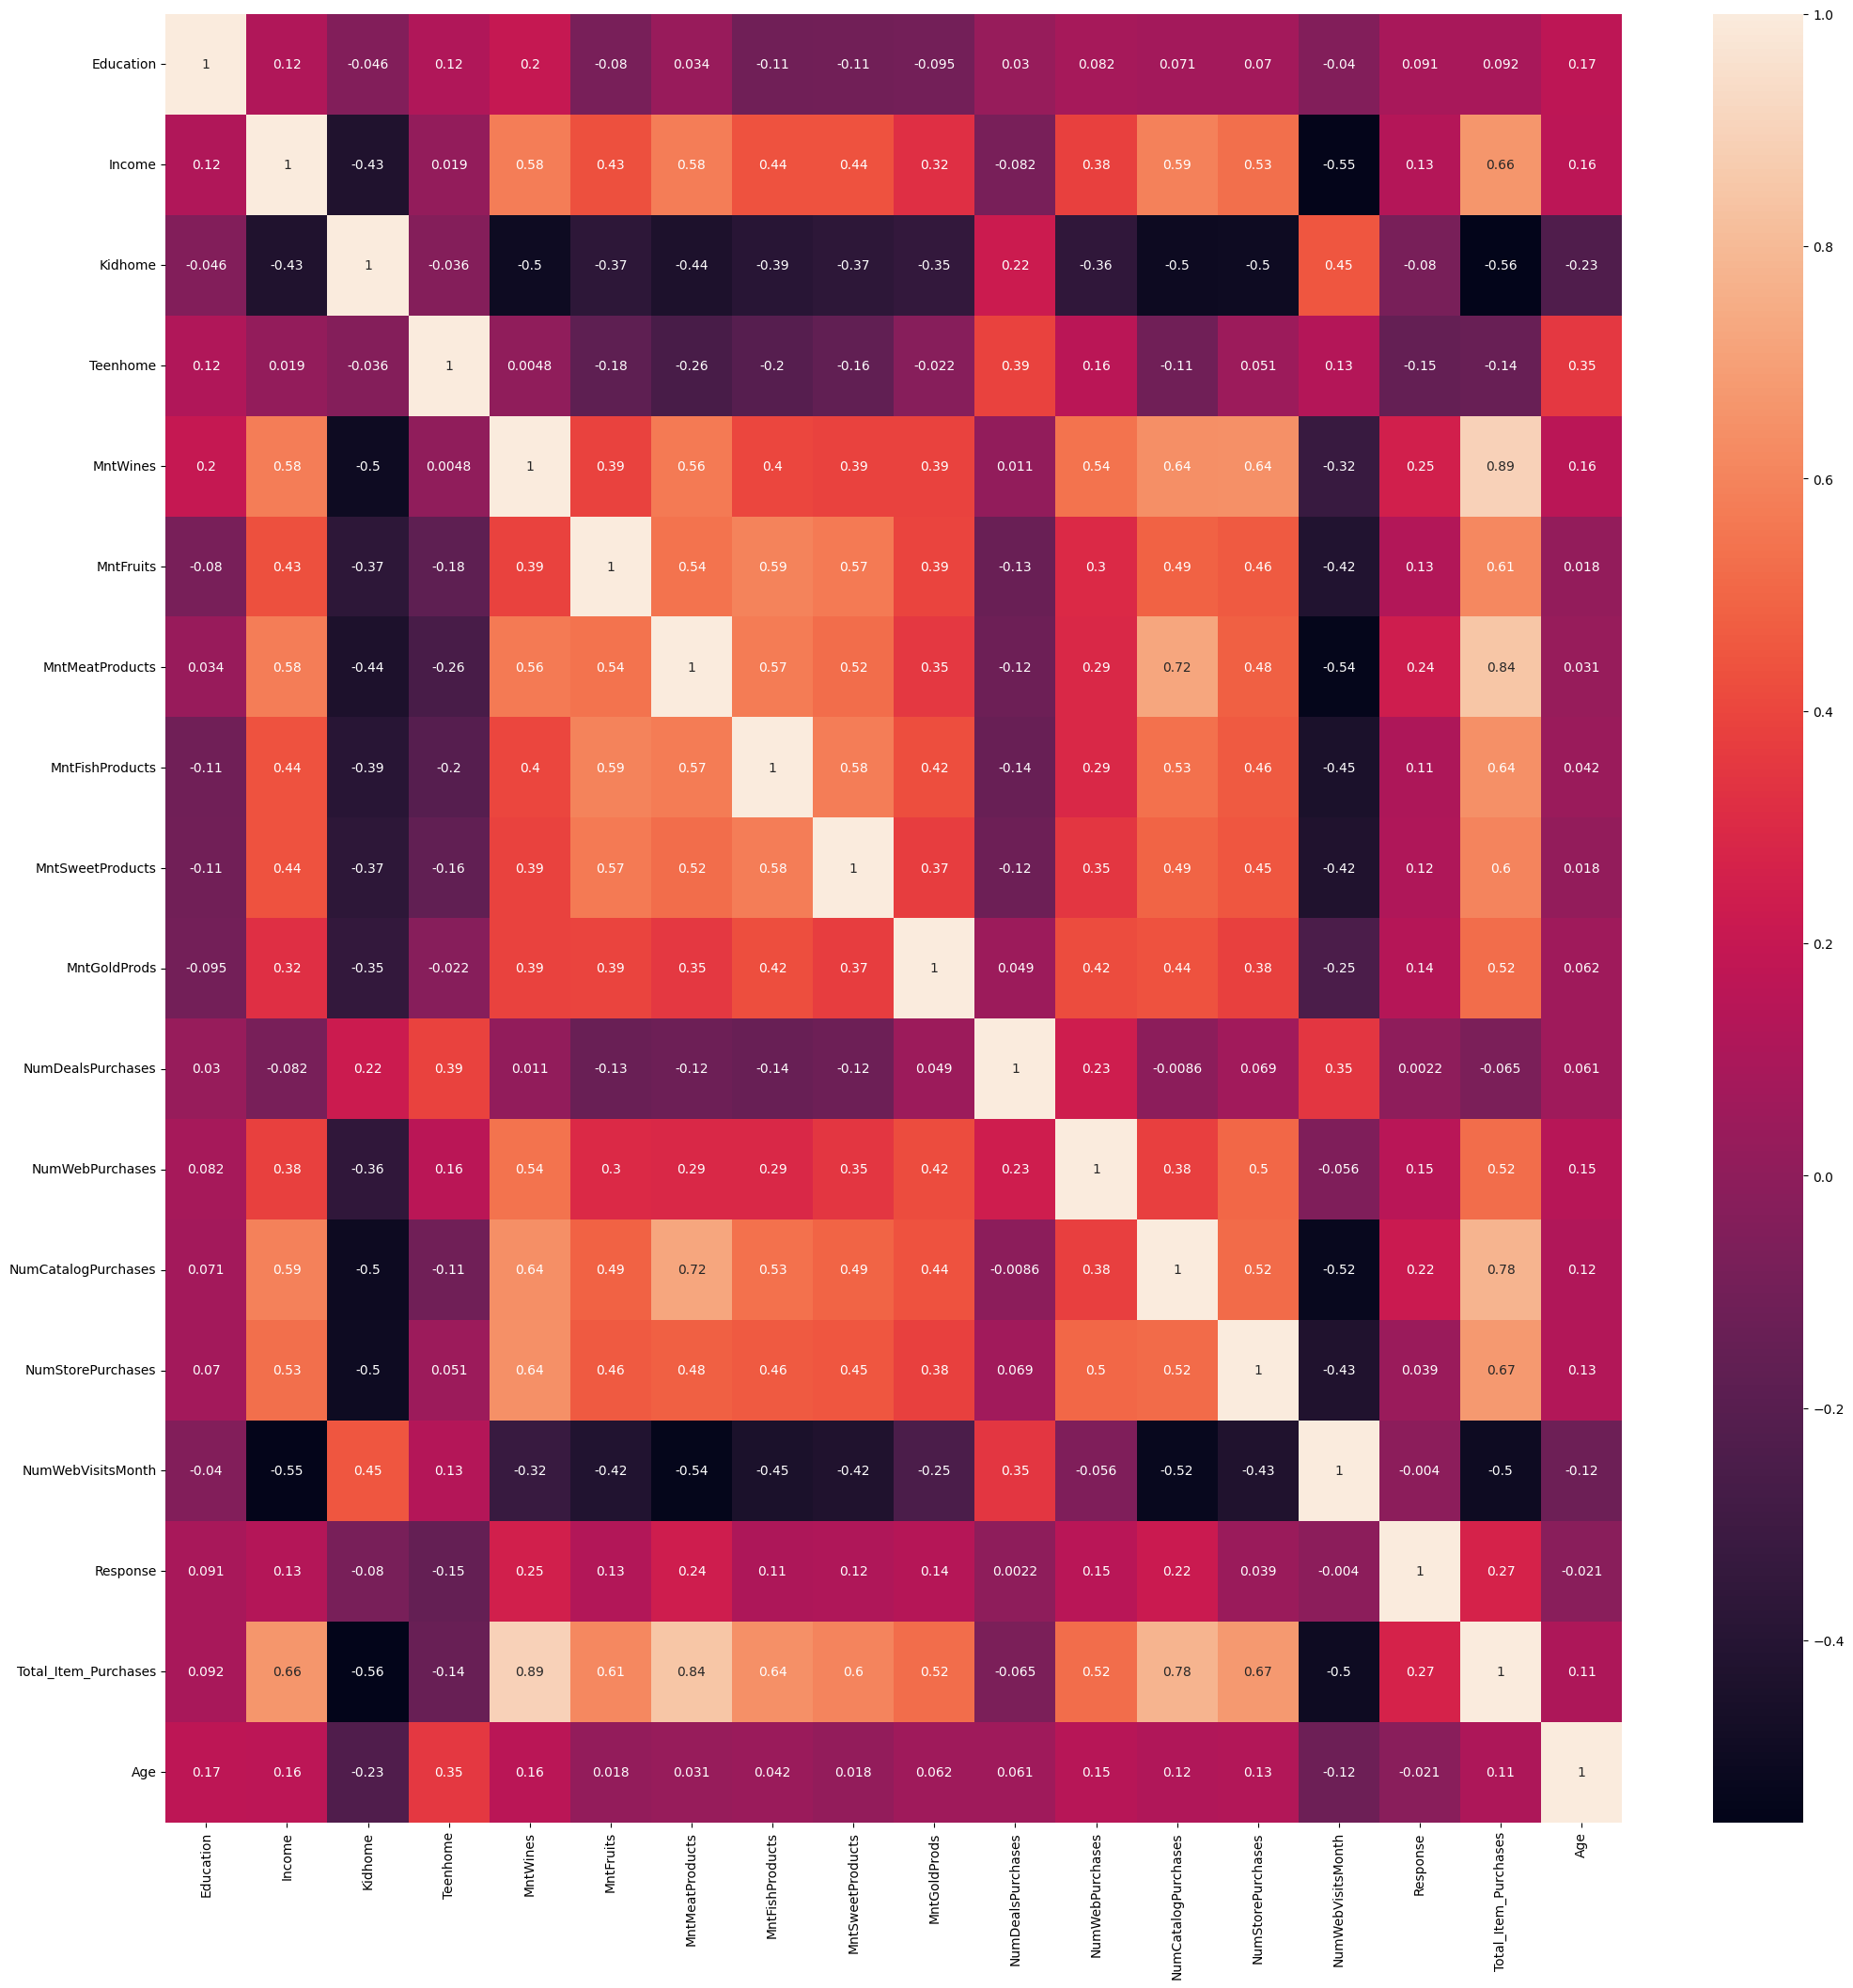

In [35]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)

# Algorithm From Scratch

In [36]:
def euclidean(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [61]:
class KMeans:
  def __init__(self,k,max_iters):
    self.k=k
    self.max_iters=max_iters
    self.clusters=[[] for _ in range(self.k)]
    self.centroids=[]

  def predict(self,X):
    self.X=X
    self.n_samples,self.n_features=X.shape

    random_sample_idxs=np.random.choice(self.n_samples,self.k,replace=False)
    self.centroids=[self.X[idx] for idx in random_sample_idxs]

    for _ in range(self.max_iters):
      self.clusters=self._create_clusters(self.centroids)

      centroids=self.centroids
      self.centroids=self._get_centroids(self.clusters)

      if self._converged(self.centroids,centroids):
        break
    return self._get_labels(self.clusters)

  def _get_labels(self, clusters):
    labels = np.empty(self.n_samples)
    for i, cluster in enumerate(clusters):
        for idx in cluster:
            labels[idx] = i
    return labels

  def _create_clusters(self,centroids):
    clusters=[[] for _ in range(self.k)]
    for i,sample in enumerate(self.X):
      idx=self._closest_centroid(sample,centroids)
      clusters[idx].append(i)
    return clusters

  def _closest_centroid(self,sample,centroids):
    distances = [euclidean(sample,point) for point in centroids]
    # Check if distances is empty
    if not distances:
      #Handle empty distances, e.g., assign to a random cluster
      return np.random.randint(0, self.k)
    else:
      return np.argmin(distances)

  def _get_centroids(self, clusters):
    centroids = np.zeros((self.k, self.n_features))
    for i, cluster in enumerate(clusters):
        if cluster:  # If the cluster is not empty
            centroids[i] = np.mean(self.X[cluster], axis=0)
        else:  # Reinitialize centroid for empty cluster
            centroids[i] = self.X[np.random.randint(0, self.n_samples)]
    return centroids

  def _converged(self,centroids,old):
    distance=[euclidean(centroids[i],old[i]) for i in range(self.k)]
    return sum(distance)==0


# Model Training

In [48]:
sc=StandardScaler()
X=sc.fit_transform(df)

In [49]:
X

array([[-0.35014129,  0.23569584, -0.82521765, ...,  2.38884634,
         1.67941681,  0.98534473],
       [-0.35014129, -0.23545419,  1.03255877, ..., -0.41861211,
        -0.96127545,  1.23573295],
       [-0.35014129,  0.77399892, -0.82521765, ..., -0.41861211,
         0.28267329,  0.3176428 ],
       ...,
       [-0.35014129,  0.18947568, -0.82521765, ..., -0.41861211,
         1.05495122, -1.01776106],
       [ 0.53910643,  0.67940139, -0.82521765, ..., -0.41861211,
         0.39394775,  1.06880747],
       [ 1.42835415,  0.02520835,  1.03255877, ...,  2.38884634,
        -0.7204576 ,  1.23573295]])

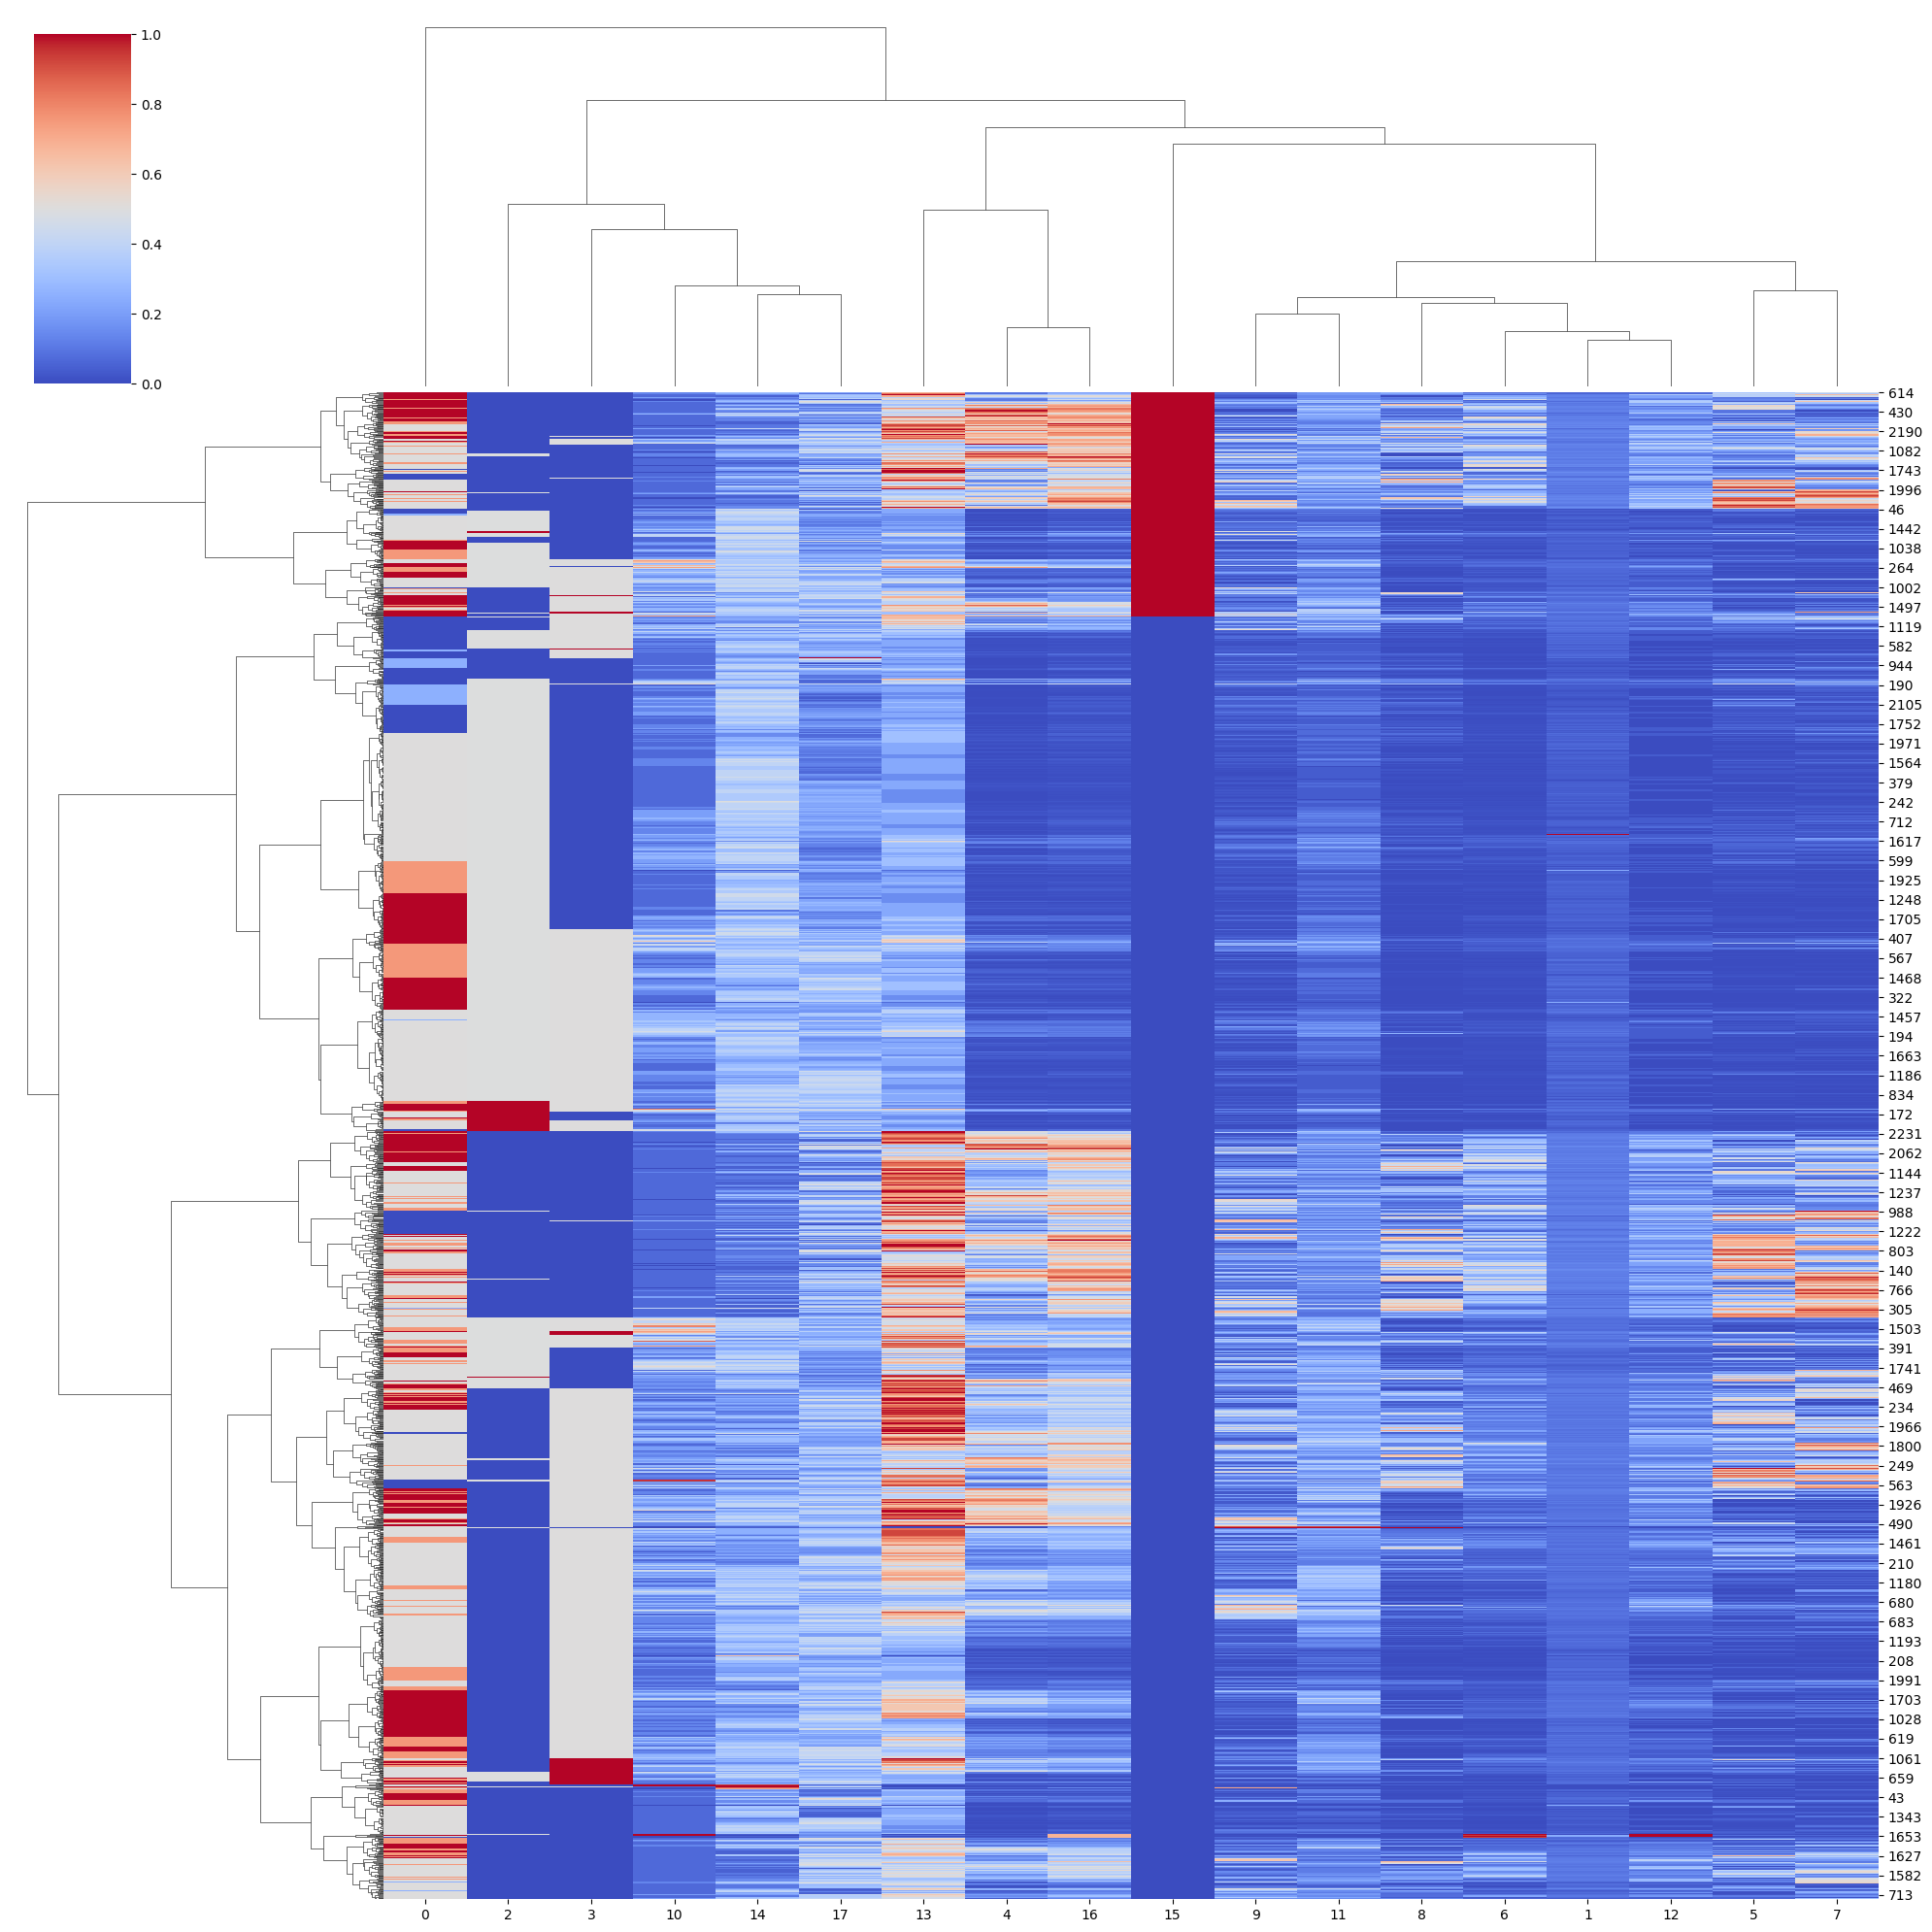

In [40]:
sns.clustermap(data=X, cmap='coolwarm', figsize=(20,20), standard_scale=1, metric='euclidean', method='ward')

In [41]:
pca=PCA(n_components=None)
reduce_df=pca.fit_transform(df)
print(pca.n_components_)
print(pca.explained_variance_ratio_)

18
[9.99490718e-01 4.42648209e-04 5.25977449e-05 8.51246937e-06
 2.64411536e-06 1.50653228e-06 1.11982989e-06 2.18302084e-07
 1.08346175e-08 8.50648548e-09 5.31241877e-09 4.80584438e-09
 2.85072138e-09 1.73809085e-09 3.29471011e-10 2.29889169e-10
 1.69269909e-10 4.35823816e-22]


In [43]:
X[np.isnan(X)]

array([], dtype=float64)

In [56]:
X

array([[-0.35014129,  0.23569584, -0.82521765, ...,  2.38884634,
         1.67941681,  0.98534473],
       [-0.35014129, -0.23545419,  1.03255877, ..., -0.41861211,
        -0.96127545,  1.23573295],
       [-0.35014129,  0.77399892, -0.82521765, ..., -0.41861211,
         0.28267329,  0.3176428 ],
       ...,
       [-0.35014129,  0.18947568, -0.82521765, ..., -0.41861211,
         1.05495122, -1.01776106],
       [ 0.53910643,  0.67940139, -0.82521765, ..., -0.41861211,
         0.39394775,  1.06880747],
       [ 1.42835415,  0.02520835,  1.03255877, ...,  2.38884634,
        -0.7204576 ,  1.23573295]])

# Best K Value Prediction

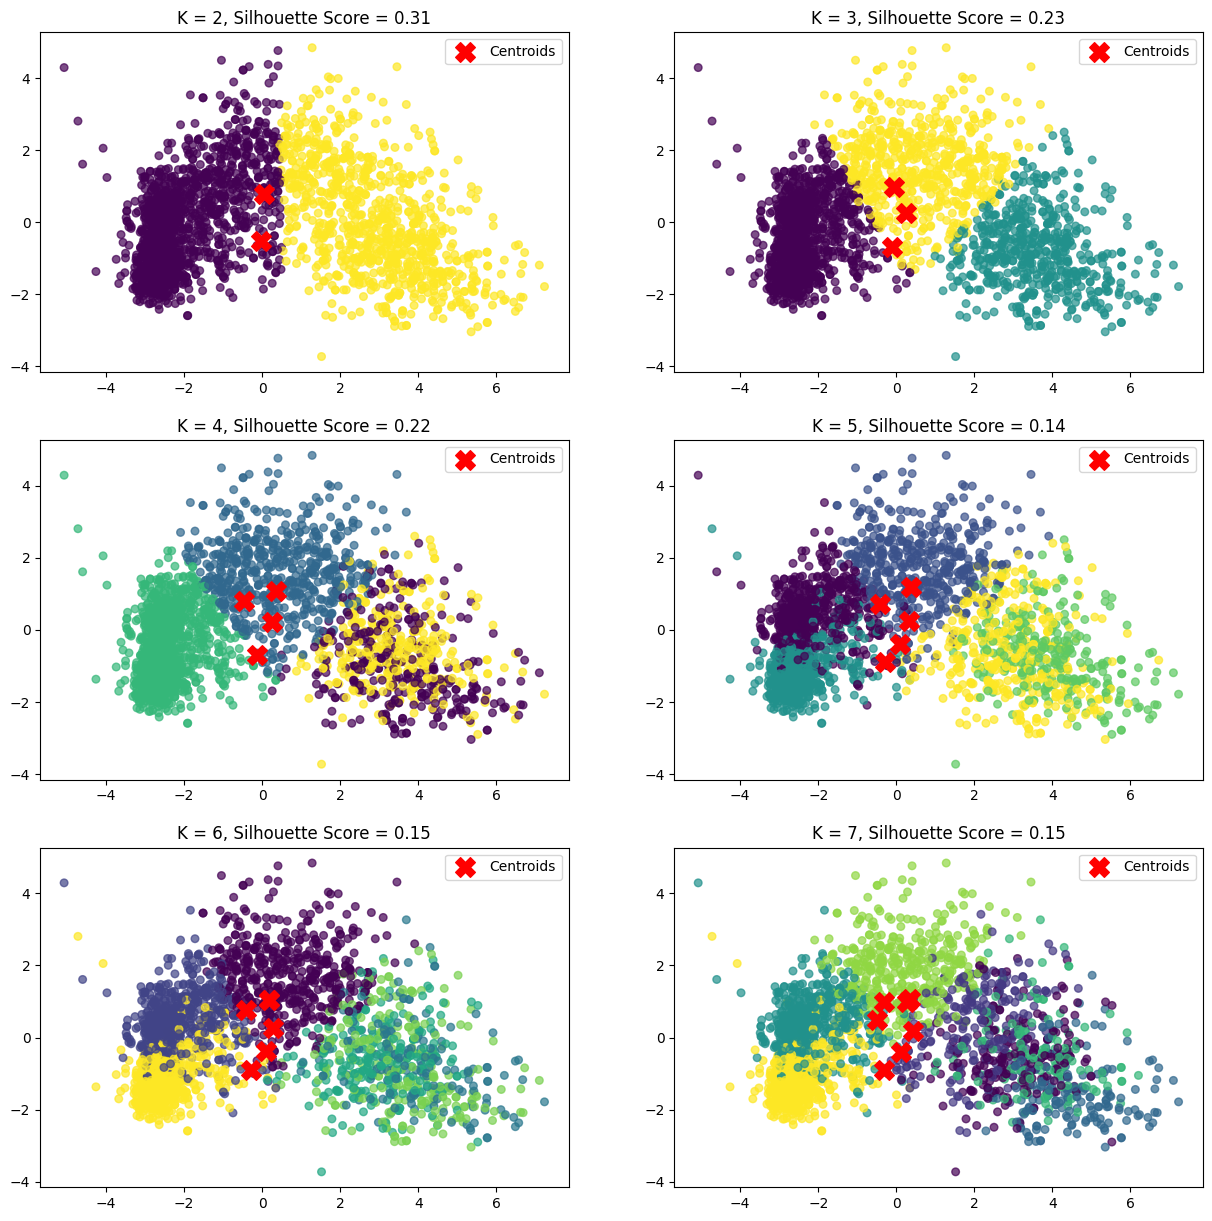

In [75]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i,k in enumerate(range(2,11)):
  kmeans=KMeans(k,3000)
  y_pred=kmeans.predict(X)
  s=silhouette_score(X,y_pred)
  if i<len(axes):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', s=30, alpha=0.7)
    axes[i].scatter(
        np.array(kmeans.centroids)[:, 0],
        np.array(kmeans.centroids)[:, 1],
        c='red',
        marker='X',
        s=200,
        label='Centroids',
    )
    axes[i].set_title(f'K = {k}, Silhouette Score = {s:.2f}')
    axes[i].legend()

# Based on the Silhouette Score, K=2 is the Best Value

In [77]:
kmeans=KMeans(2,3000)
y_pred=kmeans.predict(X)
print(silhouette_score(X,y_pred))

0.31123693412698594
